## Setup

### Change python version

In [ ]:
!sudo apt-get update -y
!sudo apt-get install python3.8 python3.8-distutils

In [ ]:
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 1
!sudo update-alternatives --config python3

In [ ]:
!python --version

In [ ]:
!sudo apt-get install python3-pip
!python3 -m pip install --upgrade pip --user

### Install lib

In [ ]:
# Cài các phiên bản yêu cầu tương thích với Python 3.8
!pip install numpy==1.19.5 \
            scipy==1.6.0 \
            pandas==1.1.5 \
            scikit-learn==0.24.2 \
            requests \
            joblib==1.0.1 \
            python-dateutil==2.9.0.post0 \
            pytz==2025.2 \
            six==1.17.0 \
            xgboost

In [ ]:
!sudo apt update
!sudo apt install -y python3-dev build-essential libpcap-dev

In [ ]:
!pip install scapy==2.4.5 --use-pep517
!pip install xgboost seaborn matplotlib

## Import data:

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
sns.set(style='darkgrid')

# Loading the dataset
data1 = pd.read_csv('/content/drive/MyDrive/idps-with-ml/data/Monday-WorkingHours.pcap_ISCX.csv')
data2 = pd.read_csv('/content/drive/MyDrive/idps-with-ml/data/Tuesday-WorkingHours.pcap_ISCX.csv')
data3 = pd.read_csv('/content/drive/MyDrive/idps-with-ml/data/Wednesday-workingHours.pcap_ISCX.csv')
data4 = pd.read_csv('/content/drive/MyDrive/idps-with-ml/data/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
data5 = pd.read_csv('/content/drive/MyDrive/idps-with-ml/data/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
data6 = pd.read_csv('/content/drive/MyDrive/idps-with-ml/data/Friday-WorkingHours-Morning.pcap_ISCX.csv')
data7 = pd.read_csv('/content/drive/MyDrive/idps-with-ml/data/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
data8 = pd.read_csv('/content/drive/MyDrive/idps-with-ml/data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

data_list = [data1, data2, data3, data4, data5, data6, data7, data8]




print('Data dimensions: ')
for i, data in enumerate(data_list, start = 1):
  rows, cols = data.shape
  print(f'Data{i} -> {rows} rows, {cols} columns')

# Concat
data = pd.concat(data_list)
rows, cols = data.shape

# Deleting dataframes after concating to save memory
for d in data_list: del d

# Renaming the columns by removing leading/trailing whitespace
col_names = {col: col.strip() for col in data.columns}
data.rename(columns = col_names, inplace = True)

Data dimensions: 
Data1 -> 529918 rows, 79 columns
Data2 -> 445909 rows, 79 columns
Data3 -> 692703 rows, 79 columns
Data4 -> 170366 rows, 79 columns
Data5 -> 288602 rows, 79 columns
Data6 -> 191033 rows, 79 columns
Data7 -> 286467 rows, 79 columns
Data8 -> 225745 rows, 79 columns


## Overview:

In [ ]:
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  Flow I

In [ ]:
pd.options.display.max_rows = 80

print('Overview of Columns:')
data.describe()

Overview of Columns:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,...,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,...,6.364257e+02,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [ ]:
pd.options.display.max_columns = 80
pd.options.display.max_columns = 80
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,3.000000e+06,5.000000e+05,4.0,0.0,4,4,4,4.0,0.0,4,4,0,0.0,0.0,0,0,0,0,0,0,40,0,5.000000e+05,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,6.666667e+05,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,6.666667e+05,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,245,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.967213e+05,3.278689e+04,61.0,0.0,61,61,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,1.639344e+04,16393.44262,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.666667e+05,2.777778e+04,72.0,0.0,72,72,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,1.388889e+04,13888.88889,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.600000e+05,2.666667e+04,75.0,0.0,75,75,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,1.333333e+04,13333.33333,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,2.500000e+05,4.166667e+04,48.0,0.0,48,48,48,48.0,0.0,48,48,0,0.0,0.0,0,0,0,0,0,0,40,0,4.166667e+04,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,4719,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


## Pre-processing

### Data Cleaning

In [10]:
# Duplicate values
dups = data[data.duplicated()]
print(f'Number of duplicates: {len(dups)}')
data.drop_duplicates(inplace = True)

# Missing values
## Replacing any infinite values (positive or negative) with NaN (not a number)
data.replace([np.inf, -np.inf], np.nan, inplace = True)

#Print missing values
missing = data.isna().sum()
print(missing.loc[missing > 0])

# Filling missing values with median
med_flow_bytes = data['Flow Bytes/s'].median()
med_flow_packets = data['Flow Packets/s'].median()

data.fillna({
    'Flow Bytes/s': med_flow_bytes,
    'Flow Packets/s': med_flow_packets
}, inplace=True)

Number of duplicates: 308381
Flow Bytes/s      1564
Flow Packets/s    1564
dtype: int64


### Analysing Patterns using Visualisations

In [11]:
from sklearn.preprocessing import LabelEncoder

# Creating a dictionary that maps each label to its attack type
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

# Creating a new column 'Attack Type' in the DataFrame based on the attack_map dictionary
data['Attack Type'] = data['Label'].map(attack_map)
data['Attack Type'].value_counts()

,count
Attack Type,
BENIGN,2096484
DoS,193748
DDoS,128016
Port Scan,90819
Brute Force,9152
Web Attack,2143
Bot,1953
Infiltration,36
Heartbleed,11


In [12]:
# Drop label column
#data.drop('Label', axis = 1, inplace = True)

# Drop Attack Typethat has <1950 samples
type_counts = data['Attack Type'].value_counts()
types_to_drop = type_counts[type_counts < 1950].index
data = data[~data['Attack Type'].isin(types_to_drop)]
data['Attack Type'].value_counts()

,count
Attack Type,
BENIGN,2096484
DoS,193748
DDoS,128016
Port Scan,90819
Brute Force,9152
Web Attack,2143
Bot,1953


In [13]:
# Use Attack Type instead of Attack Number
le = LabelEncoder()
data['Attack Number'] = le.fit_transform(data['Attack Type'])

# Printing corresponding attack type for each encoded value
encoded_values = data['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: BENIGN
1: Bot
2: Brute Force
3: DDoS
4: DoS
5: Port Scan
6: Web Attack


In [14]:
# Checking for columns with zero standard deviation (the blank squares in the heatmap)
std = data.std(numeric_only=True)
zero_std_cols = std[std == 0].index.tolist()

# Print & Drop these columns
print("Columns with zero standard deviation:")
print(zero_std_cols)
data.drop(columns=zero_std_cols, inplace=True)

Columns with zero standard deviation:
['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']


In [15]:
# Positive correlation features for 'Attack Number'
corr = data.corr(numeric_only = True).round(2)
pos_corr_features = corr['Attack Number'][(corr['Attack Number'] > 0) & (corr['Attack Number'] < 1)].index.tolist()

print("Features with positive correlation with 'Attack Number':\n")
for i, feature in enumerate(pos_corr_features, start = 1):
    corr_value = corr.loc[feature, 'Attack Number']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))

# Drop features not in pos_corr_features
valid_columns = pos_corr_features + ['Attack Number', 'Attack Type']
data.drop(columns=[col for col in data.columns if col not in valid_columns], inplace=True)


Features with positive correlation with 'Attack Number':

1.  Flow Duration            :0.27
2.  Bwd Packet Length Max    :0.53
3.  Bwd Packet Length Mean   :0.53
4.  Bwd Packet Length Std    :0.54
5.  Flow IAT Mean            :0.22
6.  Flow IAT Std             :0.4
7.  Flow IAT Max             :0.46
8.  Flow IAT Min             :0.02
9.  Fwd IAT Total            :0.27
10. Fwd IAT Mean             :0.19
11. Fwd IAT Std              :0.5
12. Fwd IAT Max              :0.46
13. Bwd IAT Total            :0.01
14. Bwd IAT Mean             :0.03
15. Bwd IAT Std              :0.2
16. Bwd IAT Max              :0.15
17. Bwd Packets/s            :0.04
18. Max Packet Length        :0.49
19. Packet Length Mean       :0.46
20. Packet Length Std        :0.5
21. Packet Length Variance   :0.46
22. FIN Flag Count           :0.28
23. PSH Flag Count           :0.17
24. ACK Flag Count           :0.07
25. Average Packet Size      :0.45
26. Avg Bwd Segment Size     :0.53
27. Init_Win_bytes_forward   :0.02
2

### Downcasting & Dropping columns with only one value

In [16]:
# For improving performance and reduce memory-related errors
old_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f'Initial memory usage: {old_memory_usage:.2f} MB')
for col in data.columns:
    col_type = data[col].dtype
    if col_type != object:
        c_min = data[col].min()
        c_max = data[col].max()
        # Downcasting float64 to float32
        if str(col_type).find('float') >= 0 and c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
            data[col] = data[col].astype(np.float32)

        # Downcasting int64 to int32
        elif str(col_type).find('int') >= 0 and c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
            data[col] = data[col].astype(np.int32)

new_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f"Final memory usage: {new_memory_usage:.2f} MB")

# Calculating percentage reduction in memory usage
print(f'Reduced memory usage: {1 - (new_memory_usage / old_memory_usage):.2%}')

# Dropping columns with only one unique value
num_unique = data.nunique()
one_variable = num_unique[num_unique == 1]
not_one_variable = num_unique[num_unique > 1].index

dropped_cols = one_variable.index
data = data[not_one_variable]

print('Dropped columns:')
dropped_cols

Initial memory usage: 692.77 MB
Final memory usage: 365.63 MB
Reduced memory usage: 47.22%
Dropped columns:


Index([], dtype='object')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2522315 entries, 0 to 225744
Data columns (total 35 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Flow Duration           int32  
 1   Bwd Packet Length Max   int32  
 2   Bwd Packet Length Mean  float32
 3   Bwd Packet Length Std   float32
 4   Flow IAT Mean           float32
 5   Flow IAT Std            float32
 6   Flow IAT Max            int32  
 7   Flow IAT Min            int32  
 8   Fwd IAT Total           int32  
 9   Fwd IAT Mean            float32
 10  Fwd IAT Std             float32
 11  Fwd IAT Max             int32  
 12  Bwd IAT Total           int32  
 13  Bwd IAT Mean            float32
 14  Bwd IAT Std             float32
 15  Bwd IAT Max             int32  
 16  Bwd Packets/s           float32
 17  Max Packet Length       int32  
 18  Packet Length Mean      float32
 19  Packet Length Std       float32
 20  Packet Length Variance  float32
 21  FIN Flag Count          int32  
 22  

## ML models

### View

In [19]:
data.columns

Index(['Flow Duration', 'Bwd Packet Length Max', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow IAT Mean', 'Flow IAT Std',
       'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean',
       'Fwd IAT Std', 'Fwd IAT Max', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd Packets/s', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'Average Packet Size', 'Avg Bwd Segment Size', 'Init_Win_bytes_forward',
       'Active Mean', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max',
       'Idle Min', 'Attack Type', 'Attack Number'],
      dtype='object')

In [20]:
data['Attack Number'] = le.fit_transform(data['Attack Type'])

# Đếm số lượng mẫu mỗi loại
counts = data['Attack Type'].value_counts()

# In theo dạng 3 cột
print(f"{'Attack Number':<15} {'Attack Type':<20} {'Count':<10}")
print("-" * 50)
for val in sorted(data['Attack Number'].unique()):
    attack = le.inverse_transform([val])[0]
    print(f"{val:<15} {attack:<20} {counts[attack]:<10}")

Attack Number   Attack Type          Count     
--------------------------------------------------
0               BENIGN               2096484   
1               Bot                  1953      
2               Brute Force          9152      
3               DDoS                 128016    
4               DoS                  193748    
5               Port Scan            90819     
6               Web Attack           2143      


### Random Forest

#### Random Forest with Cross Validation

In [21]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import joblib
import os
import time  # <-- Thêm dòng này

# Assume 'data' is your DataFrame with 'Attack Number' and 'Attack Type' columns
# Tạo mapping từ Attack Number sang Attack Type
attack_mapping = data[['Attack Number', 'Attack Type']].drop_duplicates().set_index('Attack Number')['Attack Type'].to_dict()

# Kiểm tra phân phối lớp ban đầu (chỉ hiển thị Attack Type)
print("\nPhân phối lớp ban đầu:")
class_dist = data['Attack Number'].value_counts().sort_index()
for attack_num, count in class_dist.items():
    attack_name = attack_mapping.get(attack_num, f"Unknown")
    print(f"{attack_name}: {count}")

# Chọn đặc trưng và nhãn
features = [col for col in data.columns if col not in ['Attack Type', 'Attack Number']]
X = data[features]
y = data['Attack Number']

# Lấy danh sách các lớp từ Attack Number (đảm bảo khớp với y)
unique_classes = sorted(y.unique())
target_names = [attack_mapping.get(num, f"Unknown") for num in unique_classes]

# Chia dữ liệu thành tập train và test trước khi áp dụng SMOTE/undersampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Áp dụng SMOTE và undersampling chỉ trên tập train
smote = SMOTE(sampling_strategy={
    1: 10000,  # DoS
    2: 10000,  # DDoS
    6: 10000,  # Heartbleed
}, random_state=42, k_neighbors=3)
X_train_upsampled, y_train_upsampled = smote.fit_resample(X_train, y_train)

under = RandomUnderSampler(sampling_strategy={0: 200000}, random_state=42)  # BENIGN
X_train_balanced, y_train_balanced = under.fit_resample(X_train_upsampled, y_train_upsampled)

# Tạo DataFrame từ dữ liệu train đã cân bằng
blnc_data = pd.DataFrame(X_train_balanced, columns=features)
blnc_data['Attack Number'] = y_train_balanced
blnc_data = blnc_data.sample(frac=1, random_state=0)
print("\nPhân phối lớp sau khi SMOTE và undersampling trên tập train:")
class_dist_balanced = blnc_data['Attack Number'].value_counts().sort_index()
for attack_num, count in class_dist_balanced.items():
    attack_name = attack_mapping.get(attack_num, f"Unknown")
    print(f"{attack_name}: {count}")

# Khởi tạo StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Danh sách lưu kết quả
accuracies = []
precisions = []
recalls = []
f1_scores = []
conf_matrices = []

# Bắt đầu đếm thời gian
start_time = time.time()

# Cross-validation trên tập train đã cân bằng
print("\nBắt đầu cross-validation...")
for fold, (train_idx, val_idx) in enumerate(kfold.split(blnc_data[features], blnc_data['Attack Number']), 1):
    print(f"\nFold {fold}:")

    # Chia dữ liệu
    X_train_fold = blnc_data[features].iloc[train_idx]
    y_train_fold = blnc_data['Attack Number'].iloc[train_idx]
    X_val_fold = blnc_data[features].iloc[val_idx]
    y_val_fold = blnc_data['Attack Number'].iloc[val_idx]

    # Huấn luyện mô hình
    rf = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', random_state=0)
    rf.fit(X_train_fold, y_train_fold)

    # Dự đoán trên tập validation
    y_pred = rf.predict(X_val_fold)

    # Tính toán metrics
    accuracy = accuracy_score(y_val_fold, y_pred)
    report = classification_report(y_val_fold, y_pred, target_names=target_names, output_dict=True)

    # Lưu metrics
    accuracies.append(accuracy)
    precisions.append(report['weighted avg']['precision'])
    recalls.append(report['weighted avg']['recall'])
    f1_scores.append(report['weighted avg']['f1-score'])
    conf_matrices.append(confusion_matrix(y_val_fold, y_pred))

    # In kết quả fold
    print(f"Độ chính xác: {accuracy:.4f}")
    print("\nBáo cáo phân loại:")
    print(classification_report(y_val_fold, y_pred, target_names=target_names))

# Báo cáo tổng kết
print("\nTổng kết Cross-Validation (5 folds):")
print(f"Độ chính xác trung bình: {np.mean(accuracies):.4f} (±{np.std(accuracies):.4f})")
print(f"Precision trung bình: {np.mean(precisions):.4f} (±{np.std(precisions):.4f})")
print(f"Recall trung bình: {np.mean(recalls):.4f} (±{np.std(recalls):.4f})")
print(f"F1-score trung bình: {np.mean(f1_scores):.4f} (±{np.std(f1_scores):.4f})")

# Tính ma trận nhầm lẫn trung bình
mean_conf_matrix = np.mean(conf_matrices, axis=0).astype(int)
print("\nMa trận nhầm lẫn trung bình (hàng: thực tế, cột: dự đoán):")
conf_matrix_df = pd.DataFrame(mean_conf_matrix, index=target_names, columns=target_names)
print(conf_matrix_df)

# Đánh giá mô hình trên tập test (chưa cân bằng)
print("\nĐánh giá mô hình trên tập test...")
rf_final = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', random_state=0)
rf_final.fit(X_train_balanced, y_train_balanced)
y_test_pred = rf_final.predict(X_test)

# In kết quả trên tập test
print("\nKết quả trên tập test:")
print(f"Độ chính xác: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nBáo cáo phân loại trên tập test:")
print(classification_report(y_test, y_test_pred, target_names=target_names))
print("\nMa trận nhầm lẫn trên tập test (hàng: thực tế, cột: dự đoán):")
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_conf_matrix_df = pd.DataFrame(test_conf_matrix, index=target_names, columns=target_names)
print(test_conf_matrix_df)

# Tạo folder lưu model nếu chưa có
save_dir = '/content/drive/MyDrive/idps-with-ml/model/final'
os.makedirs(save_dir, exist_ok=True)

# Lưu mô hình
model_path = os.path.join(save_dir, 'random_forest_cross.pkl')
joblib.dump(rf_final, model_path)
print(f'\n✅ Mô hình đã lưu tại: {model_path}')

# In tổng thời gian huấn luyện
end_time = time.time()
total_time = end_time - start_time
print(f"\n🕒 Tổng thời gian huấn luyện: {total_time:.2f} giây ({total_time/60:.2f} phút)")



Phân phối lớp ban đầu:
BENIGN: 2096484
Bot: 1953
Brute Force: 9152
DDoS: 128016
DoS: 193748
Port Scan: 90819
Web Attack: 2143

Phân phối lớp sau khi SMOTE và undersampling trên tập train:
BENIGN: 200000
Bot: 10000
Brute Force: 10000
DDoS: 102413
DoS: 154998
Port Scan: 72655
Web Attack: 10000

Bắt đầu cross-validation...

Fold 1:
Độ chính xác: 0.9897

Báo cáo phân loại:
              precision    recall  f1-score   support

      BENIGN       0.98      0.99      0.99     40000
         Bot       0.99      0.88      0.93      2000
 Brute Force       1.00      0.96      0.98      2000
        DDoS       1.00      1.00      1.00     20483
         DoS       1.00      0.99      0.99     31000
   Port Scan       1.00      1.00      1.00     14531
  Web Attack       0.90      0.91      0.90      2000

    accuracy                           0.99    112014
   macro avg       0.98      0.96      0.97    112014
weighted avg       0.99      0.99      0.99    112014


Fold 2:
Độ chính xác: 0.9897


#### Random Forest with Splitting

In [22]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import joblib
import os
import time

# Assume 'data' is your DataFrame with 'Attack Number' and 'Attack Type' columns
# Tạo mapping từ Attack Number sang Attack Type
attack_mapping = data[['Attack Number', 'Attack Type']].drop_duplicates().set_index('Attack Number')['Attack Type'].to_dict()

# Kiểm tra phân phối lớp ban đầu (chỉ hiển thị Attack Type)
print("\nPhân phối lớp ban đầu:")
class_dist = data['Attack Number'].value_counts().sort_index()
for attack_num, count in class_dist.items():
    attack_name = attack_mapping.get(attack_num, "Unknown")
    print(f"{attack_name}: {count}")

# Chọn đặc trưng và nhãn
features = [col for col in data.columns if col not in ['Attack Type', 'Attack Number']]
X = data[features]
y = data['Attack Number']

# Lấy danh sách các lớp từ Attack Number (đảm bảo khớp với y)
unique_classes = sorted(y.unique())
target_names = [attack_mapping.get(num, "Unknown") for num in unique_classes]

# Chia dữ liệu thành train (70%), test (20%), và validation (10%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, stratify=y_temp, random_state=42)  # 0.125 của 80% = 10% tổng

# Kiểm tra kích thước các tập
print(f"\nKích thước tập dữ liệu:")
print(f"Train: {len(X_train)} mẫu ({len(X_train)/len(data):.2%})")
print(f"Validation: {len(X_val)} mẫu ({len(X_val)/len(data):.2%})")
print(f"Test: {len(X_test)} mẫu ({len(X_test)/len(data):.2%})")

# Áp dụng SMOTE và undersampling chỉ trên tập train
smote = SMOTE(sampling_strategy={
    1: 10000,  # Bot
    2: 10000,  # Brute Force
    6: 10000,  # Web Attack
}, random_state=42, k_neighbors=3)
X_train_upsampled, y_train_upsampled = smote.fit_resample(X_train, y_train)

under = RandomUnderSampler(sampling_strategy={0: 200000}, random_state=42)  # BENIGN
X_train_balanced, y_train_balanced = under.fit_resample(X_train_upsampled, y_train_upsampled)

# Tạo DataFrame từ dữ liệu train đã cân bằng
blnc_data = pd.DataFrame(X_train_balanced, columns=features)
blnc_data['Attack Number'] = y_train_balanced
blnc_data = blnc_data.sample(frac=1, random_state=0)
print("\nPhân phối lớp sau khi SMOTE và undersampling trên tập train:")
class_dist_balanced = blnc_data['Attack Number'].value_counts().sort_index()
for attack_num, count in class_dist_balanced.items():
    attack_name = attack_mapping.get(attack_num, "Unknown")
    print(f"{attack_name}: {count}")

# Huấn luyện mô hình trên tập train đã cân bằng
print("\nHuấn luyện mô hình trên tập train...")
start_time = time.time()
rf = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', random_state=0)
rf.fit(X_train_balanced, y_train_balanced)
train_time = time.time() - start_time
print(f"Thời gian huấn luyện: {train_time:.2f} giây")

# Đánh giá trên tập validation
print("\nĐánh giá mô hình trên tập validation...")
y_val_pred = rf.predict(X_val)

# Tính toán metrics trên tập validation
accuracy = accuracy_score(y_val, y_val_pred)
report = classification_report(y_val, y_val_pred, target_names=target_names, output_dict=True)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)

# In kết quả trên tập validation
print(f"\nKết quả trên tập validation:")
print(f"Độ chính xác: {accuracy:.4f}")
print(f"Precision: {report['weighted avg']['precision']:.4f}")
print(f"Recall: {report['weighted avg']['recall']:.4f}")
print(f"F1-score: {report['weighted avg']['f1-score']:.4f}")
print("\nBáo cáo phân loại trên tập validation:")
print(classification_report(y_val, y_val_pred, target_names=target_names))
print("\nMa trận nhầm lẫn trên tập validation (hàng: thực tế, cột: dự đoán):")
val_conf_matrix_df = pd.DataFrame(val_conf_matrix, index=target_names, columns=target_names)
print(val_conf_matrix_df)

# Đánh giá mô hình trên tập test (chưa cân bằng)
print("\nĐánh giá mô hình trên tập test...")
start_time = time.time()
rf_final = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', random_state=0)
rf_final.fit(X_train_balanced, y_train_balanced)
final_train_time = time.time() - start_time
print(f"Thời gian huấn luyện mô hình cuối cùng: {final_train_time:.2f} giây")

y_test_pred = rf_final.predict(X_test)

# In kết quả trên tập test
print("\nKết quả trên tập test:")
print(f"Độ chính xác: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nBáo cáo phân loại trên tập test:")
print(classification_report(y_test, y_test_pred, target_names=target_names))
print("\nMa trận nhầm lẫn trên tập test (hàng: thực tế, cột: dự đoán):")
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_conf_matrix_df = pd.DataFrame(test_conf_matrix, index=target_names, columns=target_names)
print(test_conf_matrix_df)

# Tạo folder lưu model nếu chưa có
save_dir = '/content/drive/MyDrive/idps-with-ml/model/final'
os.makedirs(save_dir, exist_ok=True)

# Lưu mô hình
model_path = os.path.join(save_dir, 'random_forest_split.pkl')
joblib.dump(rf_final, model_path)
print(f'\n✅ Mô hình đã lưu tại: {model_path}')


Phân phối lớp ban đầu:
BENIGN: 2096484
Bot: 1953
Brute Force: 9152
DDoS: 128016
DoS: 193748
Port Scan: 90819
Web Attack: 2143

Kích thước tập dữ liệu:
Train: 1765620 mẫu (70.00%)
Validation: 252232 mẫu (10.00%)
Test: 504463 mẫu (20.00%)

Phân phối lớp sau khi SMOTE và undersampling trên tập train:
BENIGN: 200000
Bot: 10000
Brute Force: 10000
DDoS: 89611
DoS: 135623
Port Scan: 63573
Web Attack: 10000

Huấn luyện mô hình trên tập train...
Thời gian huấn luyện: 138.75 giây

Đánh giá mô hình trên tập validation...

Kết quả trên tập validation:
Độ chính xác: 0.9920
Precision: 0.9959
Recall: 0.9920
F1-score: 0.9937

Báo cáo phân loại trên tập validation:
              precision    recall  f1-score   support

      BENIGN       1.00      0.99      1.00    209649
         Bot       0.58      0.85      0.69       195
 Brute Force       1.00      0.96      0.98       915
        DDoS       1.00      1.00      1.00     12802
         DoS       0.98      0.99      0.99     19375
   Port Scan     

### Decision Tree

#### Decision Tree with Cross Validation

In [23]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier  # Thay đổi từ RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import joblib
import os
import time

# Assume 'data' is your DataFrame with 'Attack Number' and 'Attack Type' columns
# Tạo mapping từ Attack Number sang Attack Type
attack_mapping = data[['Attack Number', 'Attack Type']].drop_duplicates().set_index('Attack Number')['Attack Type'].to_dict()

# Kiểm tra phân phối lớp ban đầu (chỉ hiển thị Attack Type)
print("\nPhân phối lớp ban đầu:")
class_dist = data['Attack Number'].value_counts().sort_index()
for attack_num, count in class_dist.items():
    attack_name = attack_mapping.get(attack_num, f"Unknown")
    print(f"{attack_name}: {count}")

# Chọn đặc trưng và nhãn
features = [col for col in data.columns if col not in ['Attack Type', 'Attack Number']]
X = data[features]
y = data['Attack Number']

# Lấy danh sách các lớp từ Attack Number (đảm bảo khớp với y)
unique_classes = sorted(y.unique())
target_names = [attack_mapping.get(num, f"Unknown") for num in unique_classes]

# Chia dữ liệu thành tập train và test trước khi áp dụng SMOTE/undersampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Áp dụng SMOTE và undersampling chỉ trên tập train
smote = SMOTE(sampling_strategy={
    1: 10000,  # DoS
    2: 10000,  # DDoS
    6: 10000,  # Heartbleed
}, random_state=42, k_neighbors=3)
X_train_upsampled, y_train_upsampled = smote.fit_resample(X_train, y_train)

under = RandomUnderSampler(sampling_strategy={0: 200000}, random_state=42)  # BENIGN
X_train_balanced, y_train_balanced = under.fit_resample(X_train_upsampled, y_train_upsampled)

# Tạo DataFrame từ dữ liệu train đã cân bằng
blnc_data = pd.DataFrame(X_train_balanced, columns=features)
blnc_data['Attack Number'] = y_train_balanced
blnc_data = blnc_data.sample(frac=1, random_state=0)
print("\nPhân phối lớp sau khi SMOTE và undersampling trên tập train:")
class_dist_balanced = blnc_data['Attack Number'].value_counts().sort_index()
for attack_num, count in class_dist_balanced.items():
    attack_name = attack_mapping.get(attack_num, f"Unknown")
    print(f"{attack_name}: {count}")

# Khởi tạo StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Danh sách lưu kết quả
accuracies = []
precisions = []
recalls = []
f1_scores = []
conf_matrices = []

# Bắt đầu đếm thời gian
start_time = time.time()

# Cross-validation trên tập train đã cân bằng
print("\nBắt đầu cross-validation...")
for fold, (train_idx, val_idx) in enumerate(kfold.split(blnc_data[features], blnc_data['Attack Number']), 1):
    print(f"\nFold {fold}:")

    # Chia dữ liệu
    X_train_fold = blnc_data[features].iloc[train_idx]
    y_train_fold = blnc_data['Attack Number'].iloc[train_idx]
    X_val_fold = blnc_data[features].iloc[val_idx]
    y_val_fold = blnc_data['Attack Number'].iloc[val_idx]

    # Huấn luyện mô hình
    dt = DecisionTreeClassifier(max_depth=10, max_features='sqrt', random_state=0)  # Thay đổi từ RandomForestClassifier
    dt.fit(X_train_fold, y_train_fold)

    # Dự đoán trên tập validation
    y_pred = dt.predict(X_val_fold)

    # Tính toán metrics
    accuracy = accuracy_score(y_val_fold, y_pred)
    report = classification_report(y_val_fold, y_pred, target_names=target_names, output_dict=True)

    # Lưu metrics
    accuracies.append(accuracy)
    precisions.append(report['weighted avg']['precision'])
    recalls.append(report['weighted avg']['recall'])
    f1_scores.append(report['weighted avg']['f1-score'])
    conf_matrices.append(confusion_matrix(y_val_fold, y_pred))

    # In kết quả fold
    print(f"Độ chính xác: {accuracy:.4f}")
    print("\nBáo cáo phân loại:")
    print(classification_report(y_val_fold, y_pred, target_names=target_names))

# Báo cáo tổng kết
print("\nTổng kết Cross-Validation (5 folds):")
print(f"Độ chính xác trung bình: {np.mean(accuracies):.4f} (±{np.std(accuracies):.4f})")
print(f"Precision trung bình: {np.mean(precisions):.4f} (±{np.std(precisions):.4f})")
print(f"Recall trung bình: {np.mean(recalls):.4f} (±{np.std(recalls):.4f})")
print(f"F1-score trung bình: {np.mean(f1_scores):.4f} (±{np.std(f1_scores):.4f})")

# Tính ma trận nhầm lẫn trung bình
mean_conf_matrix = np.mean(conf_matrices, axis=0).astype(int)
print("\nMa trận nhầm lẫn trung bình (hàng: thực tế, cột: dự đoán):")
conf_matrix_df = pd.DataFrame(mean_conf_matrix, index=target_names, columns=target_names)
print(conf_matrix_df)

# Đánh giá mô hình trên tập test (chưa cân bằng)
print("\nĐánh giá mô hình trên tập test...")
dt_final = DecisionTreeClassifier(max_depth=10, max_features='sqrt', random_state=0)  # Thay đổi từ RandomForestClassifier
dt_final.fit(X_train_balanced, y_train_balanced)
y_test_pred = dt_final.predict(X_test)

# In kết quả trên tập test
print("\nKết quả trên tập test:")
print(f"Độ chính xác: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nBáo cáo phân loại trên tập test:")
print(classification_report(y_test, y_test_pred, target_names=target_names))
print("\nMa trận nhầm lẫn trên tập test (hàng: thực tế, cột: dự đoán):")
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_conf_matrix_df = pd.DataFrame(test_conf_matrix, index=target_names, columns=target_names)
print(test_conf_matrix_df)

# Tạo folder lưu model nếu chưa có
save_dir = '/content/drive/MyDrive/idps-with-ml/model/final'
os.makedirs(save_dir, exist_ok=True)

# Lưu mô hình
model_path = os.path.join(save_dir, 'decision_tree_cross.pkl')  # Thay đổi tên file model
joblib.dump(dt_final, model_path)
print(f'\n✅ Mô hình đã lưu tại: {model_path}')

# In tổng thời gian huấn luyện
end_time = time.time()
total_time = end_time - start_time
print(f"\n🕒 Tổng thời gian huấn luyện: {total_time:.2f} giây ({total_time/60:.2f} phút)")


Phân phối lớp ban đầu:
BENIGN: 2096484
Bot: 1953
Brute Force: 9152
DDoS: 128016
DoS: 193748
Port Scan: 90819
Web Attack: 2143

Phân phối lớp sau khi SMOTE và undersampling trên tập train:
BENIGN: 200000
Bot: 10000
Brute Force: 10000
DDoS: 102413
DoS: 154998
Port Scan: 72655
Web Attack: 10000

Bắt đầu cross-validation...

Fold 1:
Độ chính xác: 0.9809

Báo cáo phân loại:
              precision    recall  f1-score   support

      BENIGN       0.98      0.97      0.97     40000
         Bot       0.87      0.89      0.88      2000
 Brute Force       1.00      0.96      0.98      2000
        DDoS       0.98      1.00      0.99     20483
         DoS       0.99      0.99      0.99     31000
   Port Scan       0.99      1.00      1.00     14531
  Web Attack       0.90      0.90      0.90      2000

    accuracy                           0.98    112014
   macro avg       0.96      0.96      0.96    112014
weighted avg       0.98      0.98      0.98    112014


Fold 2:
Độ chính xác: 0.9792


#### Decision Tree with Splitting

In [24]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import joblib
import os
import time

# Kiểm tra dữ liệu đầu vào
if 'data' not in globals() or data.empty:
    raise ValueError("Dữ liệu 'data' không tồn tại hoặc rỗng!")
required_columns = ['Attack Number', 'Attack Type']
if not all(col in data.columns for col in required_columns):
    raise ValueError(f"Dữ liệu phải chứa các cột: {required_columns}")

# Tạo mapping từ Attack Number sang Attack Type
attack_mapping = data[['Attack Number', 'Attack Type']].drop_duplicates().set_index('Attack Number')['Attack Type'].to_dict()

# Kiểm tra phân phối lớp ban đầu
print("\nPhân phối lớp ban đầu:")
class_dist = data['Attack Number'].value_counts().sort_index()
for attack_num, count in class_dist.items():
    attack_name = attack_mapping.get(attack_num, "Unknown")
    print(f"{attack_name}: {count}")

# Chọn đặc trưng và nhãn
features = [col for col in data.columns if col not in ['Attack Type', 'Attack Number']]
X = data[features]
y = data['Attack Number']

# Lấy danh sách các lớp
unique_classes = sorted(y.unique())
target_names = [attack_mapping.get(num, "Unknown") for num in unique_classes]

# Chia dữ liệu: train (70%), validation (10%), test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, stratify=y_temp, random_state=42)

# Kiểm tra kích thước các tập
print(f"\nKích thước tập dữ liệu:")
print(f"Train: {len(X_train)} mẫu ({len(X_train)/len(data):.2%})")
print(f"Validation: {len(X_val)} mẫu ({len(X_val)/len(data):.2%})")
print(f"Test: {len(X_test)} mẫu ({len(X_test)/len(data):.2%})")

# Áp dụng SMOTE và undersampling trên tập train
smote = SMOTE(sampling_strategy={
    1: 10000,  # Bot
    2: 10000,  # Brute Force
    6: 10000,  # Web Attack
}, random_state=42, k_neighbors=3)
X_train_upsampled, y_train_upsampled = smote.fit_resample(X_train, y_train)

under = RandomUnderSampler(sampling_strategy={0: 200000}, random_state=42)  # BENIGN
X_train_balanced, y_train_balanced = under.fit_resample(X_train_upsampled, y_train_upsampled)

# Tạo DataFrame từ dữ liệu train đã cân bằng
blnc_data = pd.DataFrame(X_train_balanced, columns=features)
blnc_data['Attack Number'] = y_train_balanced
blnc_data = blnc_data.sample(frac=1, random_state=0)
print("\nPhân phối lớp sau khi SMOTE và undersampling trên tập train:")
class_dist_balanced = blnc_data['Attack Number'].value_counts().sort_index()
for attack_num, count in class_dist_balanced.items():
    attack_name = attack_mapping.get(attack_num, "Unknown")
    print(f"{attack_name}: {count}")

# Huấn luyện mô hình trên tập train
print("\nHuấn luyện mô hình trên tập train...")
start_time = time.time()
dt = DecisionTreeClassifier(max_depth=10, max_features='sqrt', random_state=0)  # Đổi tên biến thành dt
dt.fit(X_train_balanced, y_train_balanced)
train_time = time.time() - start_time
print(f"Thời gian huấn luyện: {train_time:.2f} giây")

# Đánh giá trên tập validation
print("\nĐánh giá mô hình trên tập validation...")
y_val_pred = dt.predict(X_val)

# Tính toán metrics trên tập validation
accuracy = accuracy_score(y_val, y_val_pred)
report = classification_report(y_val, y_val_pred, target_names=target_names, output_dict=True)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)

# In kết quả trên tập validation
print(f"\nKết quả trên tập validation:")
print(f"Độ chính xác: {accuracy:.4f}")
print(f"Precision: {report['weighted avg']['precision']:.4f}")
print(f"Recall: {report['weighted avg']['recall']:.4f}")
print(f"F1-score: {report['weighted avg']['f1-score']:.4f}")
print("\nBáo cáo phân loại trên tập validation:")
print(classification_report(y_val, y_val_pred, target_names=target_names))
print("\nMa trận nhầm lẫn trên tập validation (hàng: thực tế, cột: dự đoán):")
val_conf_matrix_df = pd.DataFrame(val_conf_matrix, index=target_names, columns=target_names)
print(val_conf_matrix_df)

# Đánh giá mô hình trên tập test
print("\nĐánh giá mô hình trên tập test...")
start_time = time.time()
dt_final = DecisionTreeClassifier(max_depth=10, max_features='sqrt', random_state=0)  # Đổi tên biến
dt_final.fit(X_train_balanced, y_train_balanced)
final_train_time = time.time() - start_time
print(f"Thời gian huấn luyện mô hình cuối cùng: {final_train_time:.2f} giây")

y_test_pred = dt_final.predict(X_test)

# In kết quả trên tập test
print("\nKết quả trên tập test:")
print(f"Độ chính xác: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nBáo cáo phân loại trên tập test:")
print(classification_report(y_test, y_test_pred, target_names=target_names))
print("\nMa trận nhầm lẫn trên tập test (hàng: thực tế, cột: dự đoán):")
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_conf_matrix_df = pd.DataFrame(test_conf_matrix, index=target_names, columns=target_names)
print(test_conf_matrix_df)

# Tạo folder lưu model nếu chưa có
save_dir = '/content/drive/MyDrive/idps-with-ml/model/final'
os.makedirs(save_dir, exist_ok=True)

# Lưu mô hình
model_path = os.path.join(save_dir, 'decision_tree_split.pkl')
joblib.dump(dt_final, model_path)
print(f'\n✅ Mô hình đã lưu tại: {model_path}')


Phân phối lớp ban đầu:
BENIGN: 2096484
Bot: 1953
Brute Force: 9152
DDoS: 128016
DoS: 193748
Port Scan: 90819
Web Attack: 2143

Kích thước tập dữ liệu:
Train: 1765620 mẫu (70.00%)
Validation: 252232 mẫu (10.00%)
Test: 504463 mẫu (20.00%)

Phân phối lớp sau khi SMOTE và undersampling trên tập train:
BENIGN: 200000
Bot: 10000
Brute Force: 10000
DDoS: 89611
DoS: 135623
Port Scan: 63573
Web Attack: 10000

Huấn luyện mô hình trên tập train...
Thời gian huấn luyện: 1.87 giây

Đánh giá mô hình trên tập validation...

Kết quả trên tập validation:
Độ chính xác: 0.9927
Precision: 0.9934
Recall: 0.9927
F1-score: 0.9929

Báo cáo phân loại trên tập validation:
              precision    recall  f1-score   support

      BENIGN       1.00      0.99      1.00    209649
         Bot       0.56      0.93      0.70       195
 Brute Force       0.99      0.96      0.97       915
        DDoS       0.98      1.00      0.99     12802
         DoS       0.96      0.99      0.97     19375
   Port Scan       

### XGBoost

#### XGBoost with Cross Validation

In [25]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier  # <-- Thêm dòng này
import pandas as pd
import numpy as np
import joblib
import os
import time

# Assume 'data' is your DataFrame with 'Attack Number' and 'Attack Type' columns
attack_mapping = data[['Attack Number', 'Attack Type']].drop_duplicates().set_index('Attack Number')['Attack Type'].to_dict()

print("\nPhân phối lớp ban đầu:")
class_dist = data['Attack Number'].value_counts().sort_index()
for attack_num, count in class_dist.items():
    attack_name = attack_mapping.get(attack_num, f"Unknown")
    print(f"{attack_name}: {count}")

features = [col for col in data.columns if col not in ['Attack Type', 'Attack Number']]
X = data[features]
y = data['Attack Number']

unique_classes = sorted(y.unique())
target_names = [attack_mapping.get(num, f"Unknown") for num in unique_classes]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

smote = SMOTE(sampling_strategy={
    1: 10000,
    2: 10000,
    6: 10000,
}, random_state=42, k_neighbors=3)
X_train_upsampled, y_train_upsampled = smote.fit_resample(X_train, y_train)

under = RandomUnderSampler(sampling_strategy={0: 200000}, random_state=42)
X_train_balanced, y_train_balanced = under.fit_resample(X_train_upsampled, y_train_upsampled)

blnc_data = pd.DataFrame(X_train_balanced, columns=features)
blnc_data['Attack Number'] = y_train_balanced
blnc_data = blnc_data.sample(frac=1, random_state=0)

print("\nPhân phối lớp sau khi SMOTE và undersampling trên tập train:")
class_dist_balanced = blnc_data['Attack Number'].value_counts().sort_index()
for attack_num, count in class_dist_balanced.items():
    attack_name = attack_mapping.get(attack_num, f"Unknown")
    print(f"{attack_name}: {count}")

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

accuracies = []
precisions = []
recalls = []
f1_scores = []
conf_matrices = []

start_time = time.time()

print("\nBắt đầu cross-validation...")
for fold, (train_idx, val_idx) in enumerate(kfold.split(blnc_data[features], blnc_data['Attack Number']), 1):
    print(f"\nFold {fold}:")

    X_train_fold = blnc_data[features].iloc[train_idx]
    y_train_fold = blnc_data['Attack Number'].iloc[train_idx]
    X_val_fold = blnc_data[features].iloc[val_idx]
    y_val_fold = blnc_data['Attack Number'].iloc[val_idx]

    # Sử dụng XGBClassifier thay vì RandomForestClassifier
    model = XGBClassifier(
        n_estimators=100,
        max_depth=10,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=0,
        verbosity=0
    )
    model.fit(X_train_fold, y_train_fold)

    y_pred = model.predict(X_val_fold)

    accuracy = accuracy_score(y_val_fold, y_pred)
    report = classification_report(y_val_fold, y_pred, target_names=target_names, output_dict=True)

    accuracies.append(accuracy)
    precisions.append(report['weighted avg']['precision'])
    recalls.append(report['weighted avg']['recall'])
    f1_scores.append(report['weighted avg']['f1-score'])
    conf_matrices.append(confusion_matrix(y_val_fold, y_pred))

    print(f"Độ chính xác: {accuracy:.4f}")
    print("\nBáo cáo phân loại:")
    print(classification_report(y_val_fold, y_pred, target_names=target_names))

print("\nTổng kết Cross-Validation (5 folds):")
print(f"Độ chính xác trung bình: {np.mean(accuracies):.4f} (±{np.std(accuracies):.4f})")
print(f"Precision trung bình: {np.mean(precisions):.4f} (±{np.std(precisions):.4f})")
print(f"Recall trung bình: {np.mean(recalls):.4f} (±{np.std(recalls):.4f})")
print(f"F1-score trung bình: {np.mean(f1_scores):.4f} (±{np.std(f1_scores):.4f})")

mean_conf_matrix = np.mean(conf_matrices, axis=0).astype(int)
print("\nMa trận nhầm lẫn trung bình (hàng: thực tế, cột: dự đoán):")
conf_matrix_df = pd.DataFrame(mean_conf_matrix, index=target_names, columns=target_names)
print(conf_matrix_df)

print("\nĐánh giá mô hình trên tập test...")
model_final = XGBClassifier(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=0,
    verbosity=0
)
model_final.fit(X_train_balanced, y_train_balanced)
y_test_pred = model_final.predict(X_test)

print("\nKết quả trên tập test:")
print(f"Độ chính xác: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nBáo cáo phân loại trên tập test:")
print(classification_report(y_test, y_test_pred, target_names=target_names))
print("\nMa trận nhầm lẫn trên tập test (hàng: thực tế, cột: dự đoán):")
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_conf_matrix_df = pd.DataFrame(test_conf_matrix, index=target_names, columns=target_names)
print(test_conf_matrix_df)

save_dir = '/content/drive/MyDrive/idps-with-ml/model/final'
os.makedirs(save_dir, exist_ok=True)

model_path = os.path.join(save_dir, 'xgboost_cross.pkl')  # Đổi tên file lưu
joblib.dump(model_final, model_path)
print(f'\n✅ Mô hình đã lưu tại: {model_path}')

end_time = time.time()
total_time = end_time - start_time
print(f"\n🕒 Tổng thời gian huấn luyện: {total_time:.2f} giây ({total_time/60:.2f} phút)")



Phân phối lớp ban đầu:
BENIGN: 2096484
Bot: 1953
Brute Force: 9152
DDoS: 128016
DoS: 193748
Port Scan: 90819
Web Attack: 2143

Phân phối lớp sau khi SMOTE và undersampling trên tập train:
BENIGN: 200000
Bot: 10000
Brute Force: 10000
DDoS: 102413
DoS: 154998
Port Scan: 72655
Web Attack: 10000

Bắt đầu cross-validation...

Fold 1:
Độ chính xác: 0.9981

Báo cáo phân loại:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     40000
         Bot       0.98      0.98      0.98      2000
 Brute Force       1.00      1.00      1.00      2000
        DDoS       1.00      1.00      1.00     20483
         DoS       1.00      1.00      1.00     31000
   Port Scan       1.00      1.00      1.00     14531
  Web Attack       0.99      0.99      0.99      2000

    accuracy                           1.00    112014
   macro avg       0.99      1.00      0.99    112014
weighted avg       1.00      1.00      1.00    112014


Fold 2:
Độ chính xác: 0.9981


#### XGBoost with Splitting

In [26]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import joblib
import os
import time

# Tạo mapping từ Attack Number sang Attack Type
attack_mapping = data[['Attack Number', 'Attack Type']].drop_duplicates().set_index('Attack Number')['Attack Type'].to_dict()

# Phân phối lớp ban đầu
print("\nPhân phối lớp ban đầu:")
class_dist = data['Attack Number'].value_counts().sort_index()
for attack_num, count in class_dist.items():
    attack_name = attack_mapping.get(attack_num, "Unknown")
    print(f"{attack_name}: {count}")

# Tách đặc trưng và nhãn
features = [col for col in data.columns if col not in ['Attack Type', 'Attack Number']]
X = data[features]
y = data['Attack Number']
unique_classes = sorted(y.unique())
target_names = [attack_mapping.get(num, "Unknown") for num in unique_classes]

# Chia tập dữ liệu
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, stratify=y_temp, random_state=42)

print(f"\nKích thước tập dữ liệu:")
print(f"Train: {len(X_train)} mẫu ({len(X_train)/len(data):.2%})")
print(f"Validation: {len(X_val)} mẫu ({len(X_val)/len(data):.2%})")
print(f"Test: {len(X_test)} mẫu ({len(X_test)/len(data):.2%})")

# SMOTE và undersampling
smote = SMOTE(sampling_strategy={1: 10000, 2: 10000, 6: 10000}, random_state=42, k_neighbors=3)
X_train_upsampled, y_train_upsampled = smote.fit_resample(X_train, y_train)
under = RandomUnderSampler(sampling_strategy={0: 200000}, random_state=42)
X_train_balanced, y_train_balanced = under.fit_resample(X_train_upsampled, y_train_upsampled)

# Shuffle tập balanced
blnc_data = pd.DataFrame(X_train_balanced, columns=features)
blnc_data['Attack Number'] = y_train_balanced
blnc_data = blnc_data.sample(frac=1, random_state=0)

print("\nPhân phối lớp sau khi SMOTE và undersampling trên tập train:")
class_dist_balanced = blnc_data['Attack Number'].value_counts().sort_index()
for attack_num, count in class_dist_balanced.items():
    attack_name = attack_mapping.get(attack_num, "Unknown")
    print(f"{attack_name}: {count}")

# Huấn luyện XGBoost
print("\nHuấn luyện mô hình XGBoost trên tập train...")
start_time = time.time()
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=0,
    verbosity=0
)
xgb.fit(X_train_balanced, y_train_balanced)
train_time = time.time() - start_time
print(f"Thời gian huấn luyện: {train_time:.2f} giây")

# Validation
print("\nĐánh giá mô hình trên tập validation...")
y_val_pred = xgb.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
report = classification_report(y_val, y_val_pred, target_names=target_names, output_dict=True)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)

print(f"\nKết quả trên tập validation:")
print(f"Độ chính xác: {accuracy:.4f}")
print(f"Precision: {report['weighted avg']['precision']:.4f}")
print(f"Recall: {report['weighted avg']['recall']:.4f}")
print(f"F1-score: {report['weighted avg']['f1-score']:.4f}")
print("\nBáo cáo phân loại trên tập validation:")
print(classification_report(y_val, y_val_pred, target_names=target_names))
print("\nMa trận nhầm lẫn trên tập validation (hàng: thực tế, cột: dự đoán):")
val_conf_matrix_df = pd.DataFrame(val_conf_matrix, index=target_names, columns=target_names)
print(val_conf_matrix_df)

# Test
print("\nĐánh giá mô hình trên tập test...")
start_time = time.time()
xgb_final = XGBClassifier(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=0,
    verbosity=0
)
xgb_final.fit(X_train_balanced, y_train_balanced)
final_train_time = time.time() - start_time
print(f"Thời gian huấn luyện mô hình cuối cùng: {final_train_time:.2f} giây")

y_test_pred = xgb_final.predict(X_test)
print("\nKết quả trên tập test:")
print(f"Độ chính xác: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nBáo cáo phân loại trên tập test:")
print(classification_report(y_test, y_test_pred, target_names=target_names))
print("\nMa trận nhầm lẫn trên tập test (hàng: thực tế, cột: dự đoán):")
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_conf_matrix_df = pd.DataFrame(test_conf_matrix, index=target_names, columns=target_names)
print(test_conf_matrix_df)

# Lưu mô hình
save_dir = '/content/drive/MyDrive/idps-with-ml/model/final'
os.makedirs(save_dir, exist_ok=True)
model_path = os.path.join(save_dir, 'xgboost_split.pkl')
joblib.dump(xgb_final, model_path)
print(f'\n✅ Mô hình đã lưu tại: {model_path}')


Phân phối lớp ban đầu:
BENIGN: 2096484
Bot: 1953
Brute Force: 9152
DDoS: 128016
DoS: 193748
Port Scan: 90819
Web Attack: 2143

Kích thước tập dữ liệu:
Train: 1765620 mẫu (70.00%)
Validation: 252232 mẫu (10.00%)
Test: 504463 mẫu (20.00%)

Phân phối lớp sau khi SMOTE và undersampling trên tập train:
BENIGN: 200000
Bot: 10000
Brute Force: 10000
DDoS: 89611
DoS: 135623
Port Scan: 63573
Web Attack: 10000

Huấn luyện mô hình XGBoost trên tập train...
Thời gian huấn luyện: 63.24 giây

Đánh giá mô hình trên tập validation...

Kết quả trên tập validation:
Độ chính xác: 0.9974
Precision: 0.9981
Recall: 0.9974
F1-score: 0.9977

Báo cáo phân loại trên tập validation:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00    209649
         Bot       0.51      0.98      0.67       195
 Brute Force       0.99      1.00      1.00       915
        DDoS       1.00      1.00      1.00     12802
         DoS       0.99      1.00      1.00     19375
   Port Sc

## Model Evaluation

### Models using Cross Validation Comparison

In [27]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
import os

# Assume 'data' is your DataFrame with 'Attack Number' and 'Attack Type' columns
# Tạo mapping từ Attack Number sang Attack Type
attack_mapping = data[['Attack Number', 'Attack Type']].drop_duplicates().set_index('Attack Number')['Attack Type'].to_dict()
features = [col for col in data.columns if col not in ['Attack Type', 'Attack Number']]
X = data[features]
y = data['Attack Number']
unique_classes = sorted(y.unique())
target_names = [attack_mapping.get(num, f"Unknown") for num in unique_classes]

# Chia dữ liệu thành tập train và test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Đường dẫn tới các mô hình đã lưu
model_paths = {
    'Random Forest': '/content/drive/MyDrive/idps-with-ml/model/final/random_forest_cross.pkl',
    'Decision Tree': '/content/drive/MyDrive/idps-with-ml/model/final/decision_tree_cross.pkl',
    'XGBoost': '/content/drive/MyDrive/idps-with-ml/model/final/xgboost_cross.pkl'
}

# Dictionary lưu kết quả
results = {
    'Model': [],
    'Accuracy': [],
    'Macro F1': [],
    'Weighted F1': [],
    'PR-AUC': [],
    'Confusion Matrix': [],
    'Classification Report': []
}

# Tính PR-AUC cho từng lớp
def compute_pr_auc(y_true, y_pred_proba, n_classes):
    y_true_bin = label_binarize(y_true, classes=range(n_classes))
    pr_auc_scores = []
    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_pred_proba[:, i])
        pr_auc = auc(recall, precision)
        pr_auc_scores.append(pr_auc)
    return np.mean(pr_auc_scores)

# Đánh giá từng mô hình
for model_name, model_path in model_paths.items():
    if os.path.exists(model_path):
        # Tải mô hình
        model = joblib.load(model_path)

        # Dự đoán trên tập test
        y_pred = model.predict(X_test)

        # Tính toán các chỉ số
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Tính PR-AUC
        if hasattr(model, 'predict_proba'):
            y_pred_proba = model.predict_proba(X_test)
            pr_auc = compute_pr_auc(y_test, y_pred_proba, len(unique_classes))
        else:
            pr_auc = None  # Decision Tree có thể không có predict_proba nếu không cấu hình

        # Lưu kết quả
        results['Model'].append(model_name)
        results['Accuracy'].append(accuracy)
        results['Macro F1'].append(report['macro avg']['f1-score'])
        results['Weighted F1'].append(report['weighted avg']['f1-score'])
        results['PR-AUC'].append(pr_auc)
        results['Confusion Matrix'].append(conf_matrix)
        results['Classification Report'].append(report)

        # In kết quả
        print(f"\nKết quả cho {model_name}:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Macro F1-Score: {report['macro avg']['f1-score']:.4f}")
        print(f"Weighted F1-Score: {report['weighted avg']['f1-score']:.4f}")
        print(f"PR-AUC: {pr_auc:.4f}" if pr_auc is not None else "PR-AUC: N/A")
        print("\nBáo cáo phân loại:")
        print(classification_report(y_test, y_pred, target_names=target_names))
        print("\nMa trận nhầm lẫn (hàng: thực tế, cột: dự đoán):")
        print(pd.DataFrame(conf_matrix, index=target_names, columns=target_names))
    else:
        print(f"\nMô hình {model_name} không tồn tại tại: {model_path}")

# Chuyển results thành DataFrame để dễ so sánh
results_df = pd.DataFrame({
    'Model': results['Model'],
    'Accuracy': results['Accuracy'],
    'Macro F1': results['Macro F1'],
    'Weighted F1': results['Weighted F1'],
    'PR-AUC': results['PR-AUC']
})
print("\nSo sánh các mô hình:")
print(results_df)


Kết quả cho Random Forest:
Accuracy: 0.9923
Macro F1-Score: 0.8462
Weighted F1-Score: 0.9939
PR-AUC: 0.9212

Báo cáo phân loại:
              precision    recall  f1-score   support

      BENIGN       1.00      0.99      1.00    419297
         Bot       0.60      0.87      0.71       390
 Brute Force       1.00      0.96      0.98      1830
        DDoS       1.00      1.00      1.00     25603
         DoS       0.99      0.99      0.99     38750
   Port Scan       0.99      1.00      0.99     18164
  Web Attack       0.15      0.92      0.26       429

    accuracy                           0.99    504463
   macro avg       0.82      0.96      0.85    504463
weighted avg       1.00      0.99      0.99    504463


Ma trận nhầm lẫn (hàng: thực tế, cột: dự đoán):
             BENIGN  Bot  Brute Force   DDoS    DoS  Port Scan  Web Attack
BENIGN       416032  231            2     44    550        207        2231
Bot              49  341            0      0      0          0           0


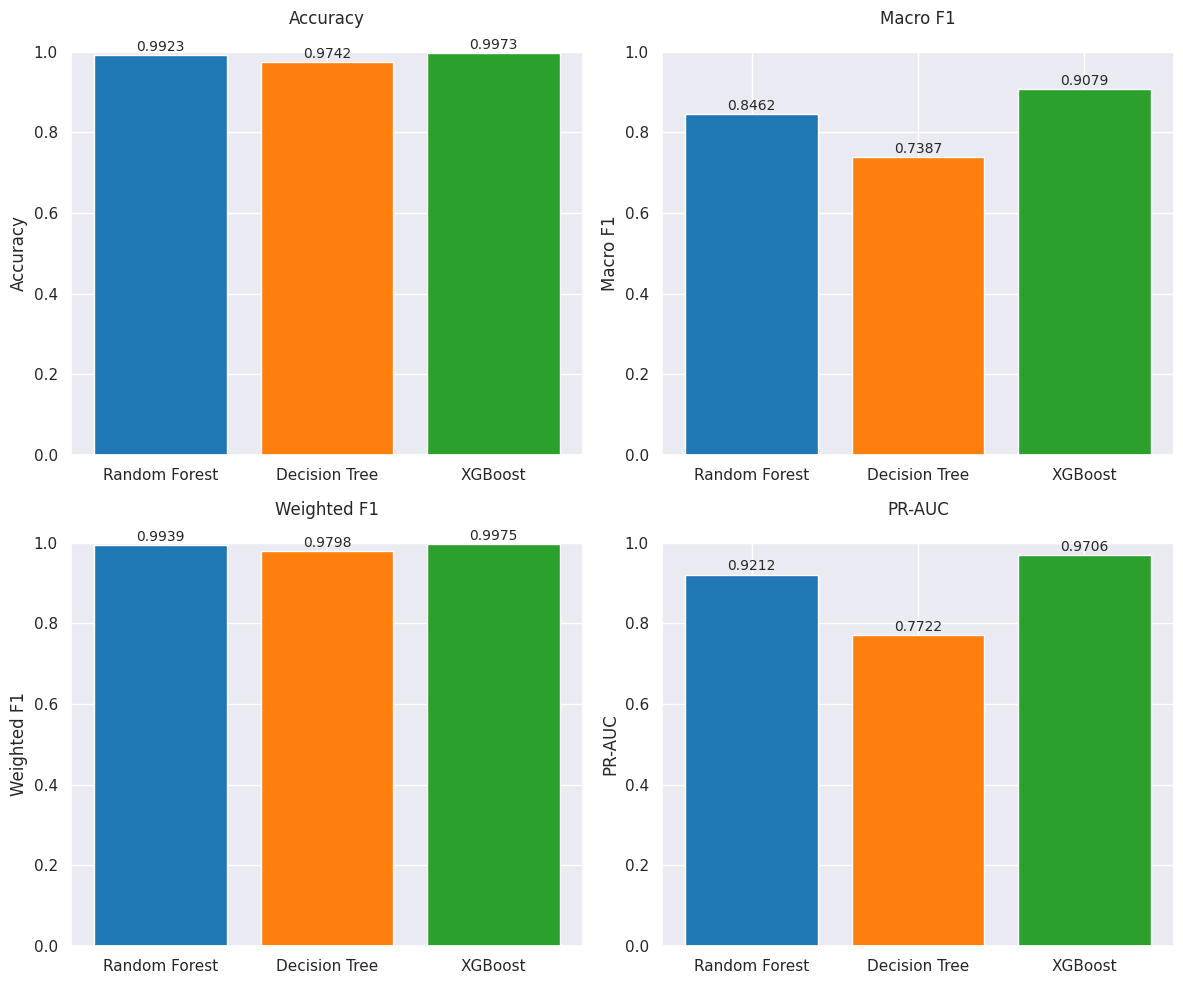

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Giả sử results_df đã được tạo từ đoạn mã đánh giá
# results_df chứa các cột: 'Model', 'Accuracy', 'Macro F1', 'Weighted F1', 'PR-AUC'

# Vẽ biểu đồ cột
metrics = ['Accuracy', 'Macro F1', 'Weighted F1', 'PR-AUC']
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Màu cho Random Forest, Decision Tree, XGBoost

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    ax[row, col].bar(results_df['Model'], results_df[metric], color=colors)
    ax[row, col].set_title(f'{metric}', pad=20)  # Tăng khoảng cách tiêu đề
    ax[row, col].set_ylabel(metric)
    ax[row, col].set_ylim(0, 1)
    for j, v in enumerate(results_df[metric]):
        ax[row, col].text(j, v + 0.01, f'{v:.4f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

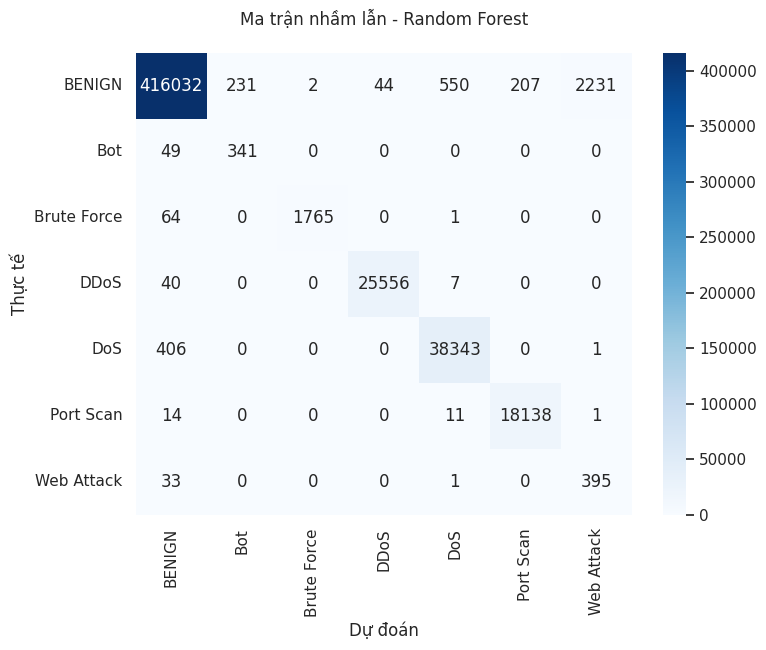

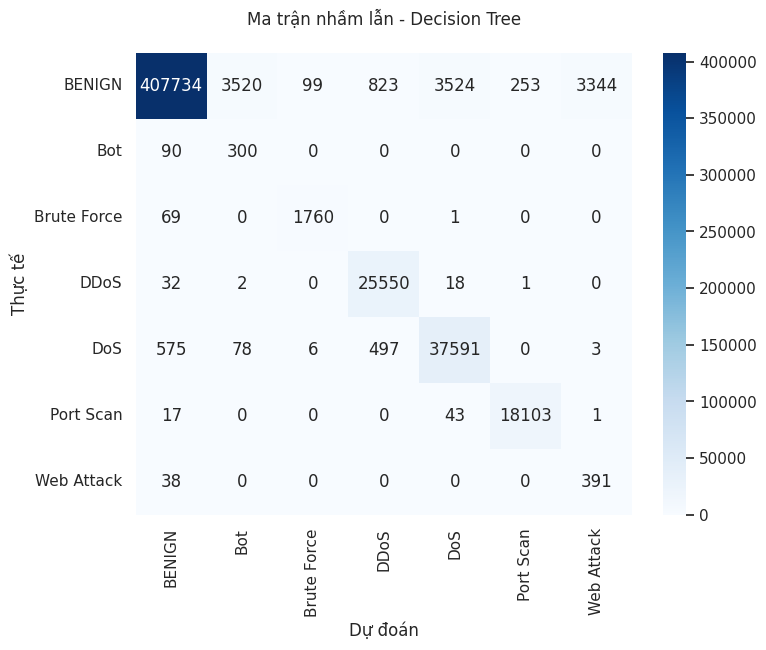

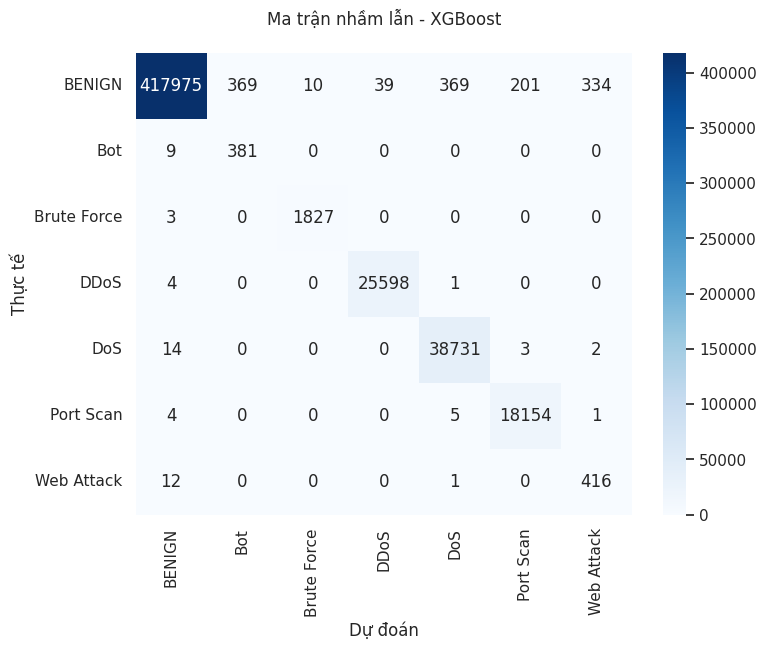

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Giả sử results và target_names đã được tạo từ đoạn mã đánh giá
# results chứa 'Model', 'Confusion Matrix'
# target_names chứa tên các lớp (BENIGN, Bot, Brute Force, ...)

for i, model_name in enumerate(results['Model']):
    conf_matrix = results['Confusion Matrix'][i]
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Ma trận nhầm lẫn - {model_name}', pad=20)  # Tăng khoảng cách tiêu đề
    plt.ylabel('Thực tế')
    plt.xlabel('Dự đoán')
    plt.show()

<ipython-input-30-75da9bf11e36>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = metrics_df[metric][j]


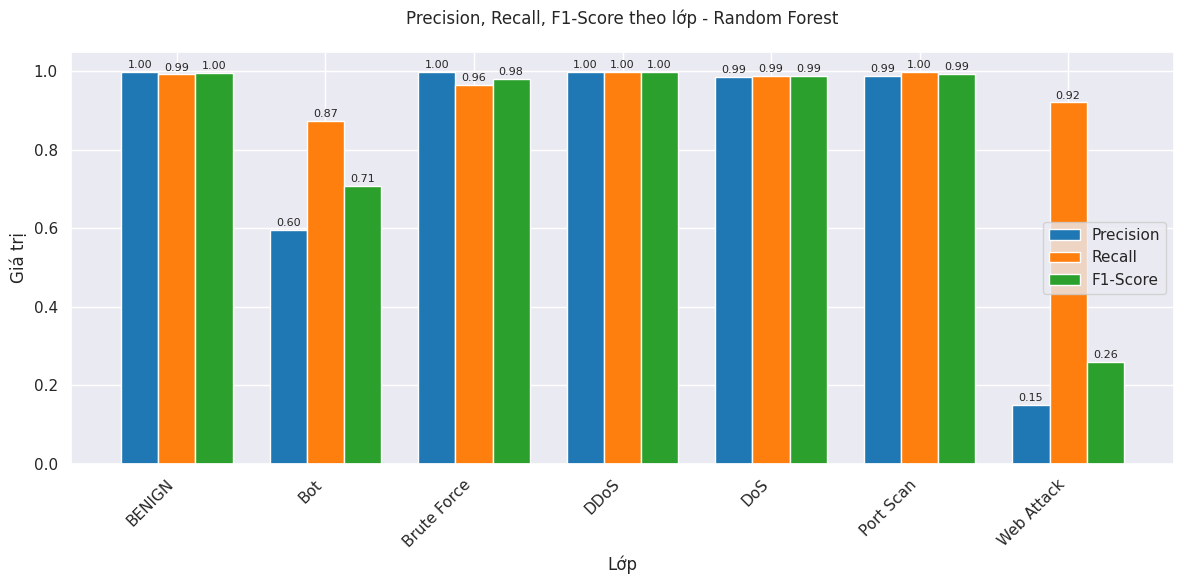

<ipython-input-30-75da9bf11e36>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = metrics_df[metric][j]


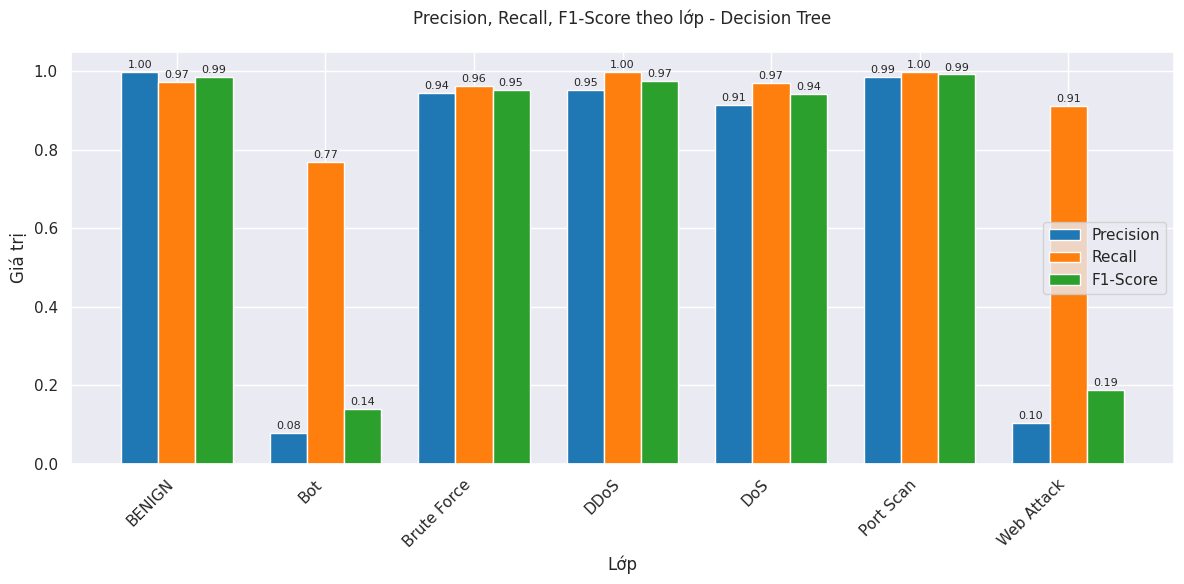

<ipython-input-30-75da9bf11e36>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = metrics_df[metric][j]


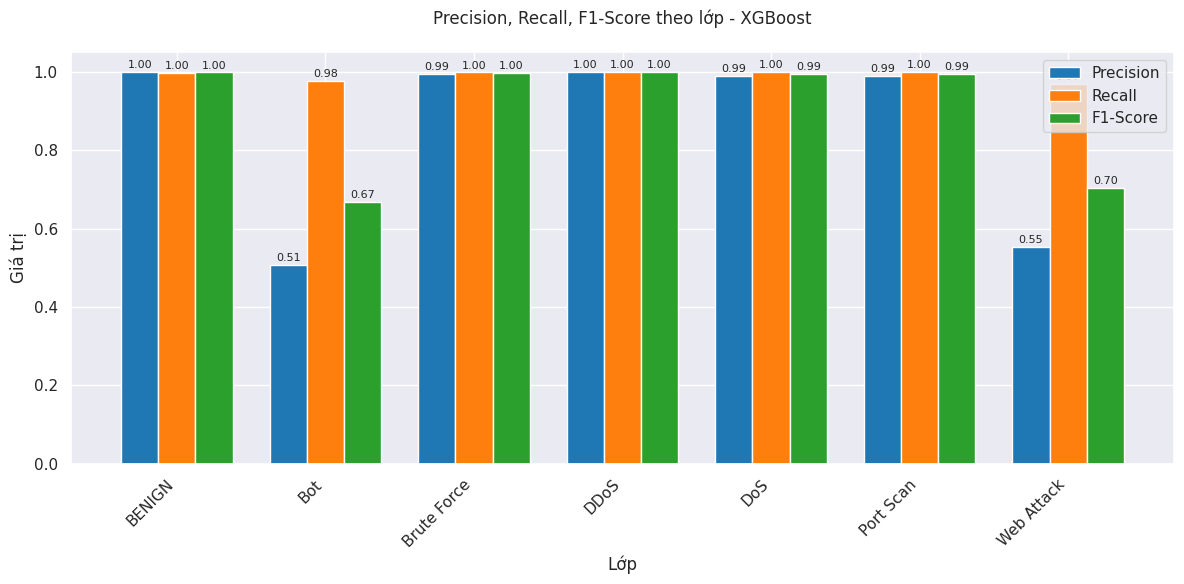

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Giả sử results và target_names đã được tạo từ đoạn mã đánh giá
# results chứa 'Model', 'Classification Report'
# target_names chứa tên các lớp (BENIGN, Bot, Brute Force, ...)

for i, model_name in enumerate(results['Model']):
    report = results['Classification Report'][i]

    # Tạo DataFrame từ báo cáo phân loại
    metrics_df = pd.DataFrame({
        'Precision': [report[cls]['precision'] for cls in target_names],
        'Recall': [report[cls]['recall'] for cls in target_names],
        'F1-Score': [report[cls]['f1-score'] for cls in target_names]
    }, index=target_names)

    # Vẽ biểu đồ cột
    fig, ax = plt.subplots(figsize=(12, 6))
    x = np.arange(len(target_names))
    width = 0.25

    ax.bar(x - width, metrics_df['Precision'], width, label='Precision', color='#1f77b4')
    ax.bar(x, metrics_df['Recall'], width, label='Recall', color='#ff7f0e')
    ax.bar(x + width, metrics_df['F1-Score'], width, label='F1-Score', color='#2ca02c')

    ax.set_xlabel('Lớp')
    ax.set_ylabel('Giá trị')
    ax.set_title(f'Precision, Recall, F1-Score theo lớp - {model_name}', pad=20)  # Tăng khoảng cách tiêu đề
    ax.set_xticks(x)
    ax.set_xticklabels(target_names, rotation=45, ha='right')
    ax.legend()

    for j in range(len(target_names)):
        for k, metric in enumerate(['Precision', 'Recall', 'F1-Score']):
            value = metrics_df[metric][j]
            ax.text(j + (k-1)*width, value + 0.01, f'{value:.2f}', ha='center', fontsize=8)

    plt.tight_layout()
    plt.show()

### Models using Splitting Comparison

In [31]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
import os

# Giả sử 'data' là DataFrame chứa dữ liệu CICIDS2017
# Tạo mapping từ Attack Number sang Attack Type
attack_mapping = data[['Attack Number', 'Attack Type']].drop_duplicates().set_index('Attack Number')['Attack Type'].to_dict()
features = [col for col in data.columns if col not in ['Attack Type', 'Attack Number']]
X = data[features]
y = data['Attack Number']
unique_classes = sorted(y.unique())
target_names = [attack_mapping.get(num, "Unknown") for num in unique_classes]

# Chia dữ liệu thành train (70%), validation (10%), test (20%)
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, stratify=y_temp, random_state=42)

# Đường dẫn tới các mô hình đã lưu
model_paths = {
    'Random Forest': '/content/drive/MyDrive/idps-with-ml/model/final/random_forest_split.pkl',
    'Decision Tree': '/content/drive/MyDrive/idps-with-ml/model/final/decision_tree_split.pkl',
    'XGBoost': '/content/drive/MyDrive/idps-with-ml/model/final/xgboost_split.pkl'
}

# Dictionary lưu kết quả
results = {
    'Model': [],
    'Accuracy': [],
    'Macro F1': [],
    'Weighted F1': [],
    'PR-AUC': [],
    'Confusion Matrix': [],
    'Classification Report': [],
    'Training Time': []  # Lưu thời gian huấn luyện
}

# Giả sử thời gian huấn luyện từ quá trình huấn luyện (lấy từ final_train_time trong mã của bạn)
# Vì không có giá trị thực tế, tôi sẽ để placeholder, bạn có thể thay bằng giá trị thực
training_times = {
    'Random Forest': 0.0,  # Thay bằng final_train_time từ mã Random Forest
    'Decision Tree': 0.0,  # Thay bằng final_train_time từ mã Decision Tree
    'XGBoost': 0.0        # Thay bằng final_train_time từ mã XGBoost
}

# Tính PR-AUC cho từng lớp
def compute_pr_auc(y_true, y_pred_proba, n_classes):
    y_true_bin = label_binarize(y_true, classes=range(n_classes))
    pr_auc_scores = []
    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_pred_proba[:, i])
        pr_auc = auc(recall, precision)
        pr_auc_scores.append(pr_auc)
    return np.mean(pr_auc_scores)

# Đánh giá từng mô hình
for model_name, model_path in model_paths.items():
    if os.path.exists(model_path):
        # Tải mô hình
        model = joblib.load(model_path)

        # Dự đoán trên tập test
        y_pred = model.predict(X_test)

        # Tính toán các chỉ số
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Tính PR-AUC
        pr_auc = None
        if hasattr(model, 'predict_proba'):
            y_pred_proba = model.predict_proba(X_test)
            pr_auc = compute_pr_auc(y_test, y_pred_proba, len(unique_classes))

        # Lưu kết quả
        results['Model'].append(model_name)
        results['Accuracy'].append(accuracy)
        results['Macro F1'].append(report['macro avg']['f1-score'])
        results['Weighted F1'].append(report['weighted avg']['f1-score'])
        results['PR-AUC'].append(pr_auc)
        results['Confusion Matrix'].append(conf_matrix)
        results['Classification Report'].append(report)
        results['Training Time'].append(training_times[model_name])

        # In kết quả
        print(f"\nKết quả cho {model_name}:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Macro F1-Score: {report['macro avg']['f1-score']:.4f}")
        print(f"Weighted F1-Score: {report['weighted avg']['f1-score']:.4f}")
        print(f"PR-AUC: {pr_auc:.4f}" if pr_auc is not None else "PR-AUC: N/A")
        print(f"Training Time: {training_times[model_name]:.2f} giây")
        print("\nBáo cáo phân loại:")
        print(classification_report(y_test, y_pred, target_names=target_names))
        print("\nMa trận nhầm lẫn (hàng: thực tế, cột: dự đoán):")
        print(pd.DataFrame(conf_matrix, index=target_names, columns=target_names))
    else:
        print(f"\nMô hình {model_name} không tồn tại tại: {model_path}")

# Chuyển results thành DataFrame
results_df = pd.DataFrame({
    'Model': results['Model'],
    'Accuracy': results['Accuracy'],
    'Macro F1': results['Macro F1'],
    'Weighted F1': results['Weighted F1'],
    'PR-AUC': results['PR-AUC'],
    'Training Time': results['Training Time']
})
print("\nSo sánh các mô hình:")
print(results_df)


Kết quả cho Random Forest:
Accuracy: 0.9920
Macro F1-Score: 0.8449
Weighted F1-Score: 0.9937
PR-AUC: 0.9227
Training Time: 0.00 giây

Báo cáo phân loại:
              precision    recall  f1-score   support

      BENIGN       1.00      0.99      1.00    419297
         Bot       0.59      0.87      0.70       390
 Brute Force       1.00      0.96      0.98      1830
        DDoS       1.00      1.00      1.00     25603
         DoS       0.98      0.99      0.99     38750
   Port Scan       0.99      1.00      0.99     18164
  Web Attack       0.15      0.92      0.26       429

    accuracy                           0.99    504463
   macro avg       0.82      0.96      0.84    504463
weighted avg       1.00      0.99      0.99    504463


Ma trận nhầm lẫn (hàng: thực tế, cột: dự đoán):
             BENIGN  Bot  Brute Force   DDoS    DoS  Port Scan  Web Attack
BENIGN       415940  238            2     57    627        206        2227
Bot              50  340            0      0      

<ipython-input-32-18ecfa5e617a>:21: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax[row, col].set_ylim(0, max(results_df['Training Time']) * 1.2)


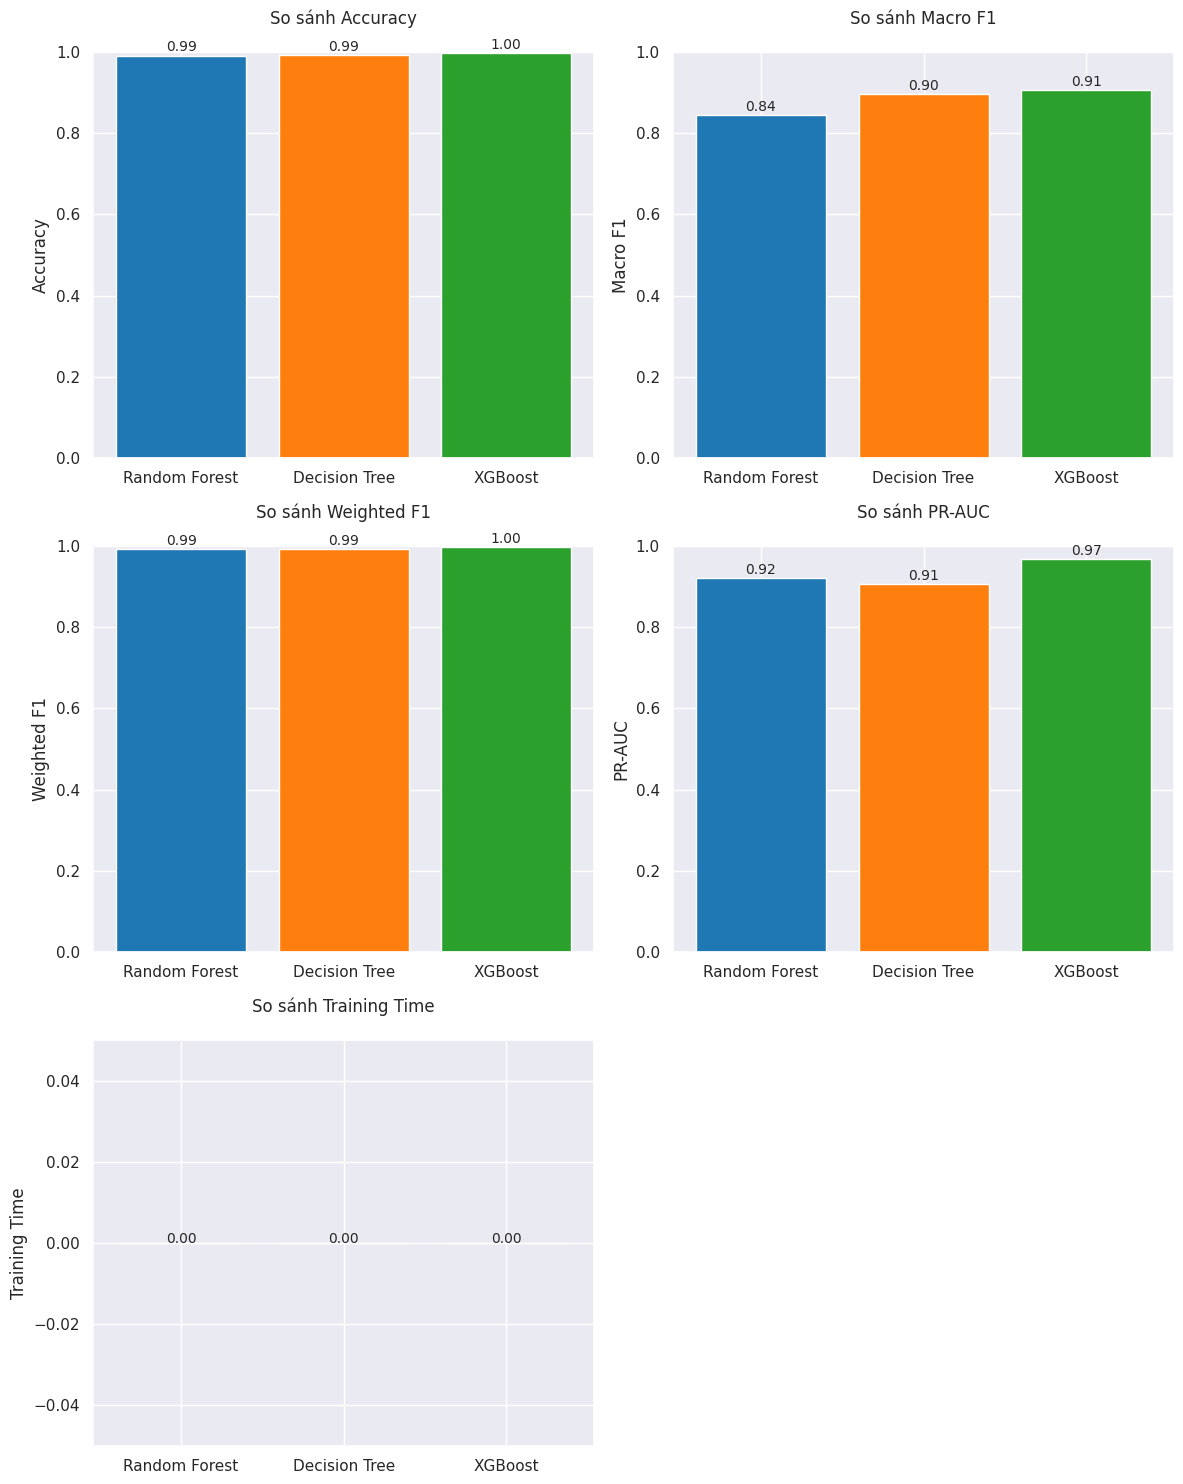

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Giả sử results_df đã được tạo từ đoạn mã đánh giá
# results_df chứa các cột: 'Model', 'Accuracy', 'Macro F1', 'Weighted F1', 'PR-AUC', 'Training Time'

# Vẽ biểu đồ cột
metrics = ['Accuracy', 'Macro F1', 'Weighted F1', 'PR-AUC', 'Training Time']
fig, ax = plt.subplots(3, 2, figsize=(12, 15))  # Tăng số hàng để chứa Training Time
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Màu cho Random Forest, Decision Tree, XGBoost

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    ax[row, col].bar(results_df['Model'], results_df[metric], color=colors)
    ax[row, col].set_title(f'So sánh {metric}', pad=20)
    ax[row, col].set_ylabel(metric)
    if metric != 'Training Time':
        ax[row, col].set_ylim(0, 1)
    else:
        ax[row, col].set_ylim(0, max(results_df['Training Time']) * 1.2)
    for j, v in enumerate(results_df[metric]):
        ax[row, col].text(j, v + (0.01 if metric != 'Training Time' else v * 0.05), f'{v:.2f}', ha='center', fontsize=10)

# Ẩn ô cuối nếu không dùng
ax[2, 1].axis('off')
plt.tight_layout()
plt.show()

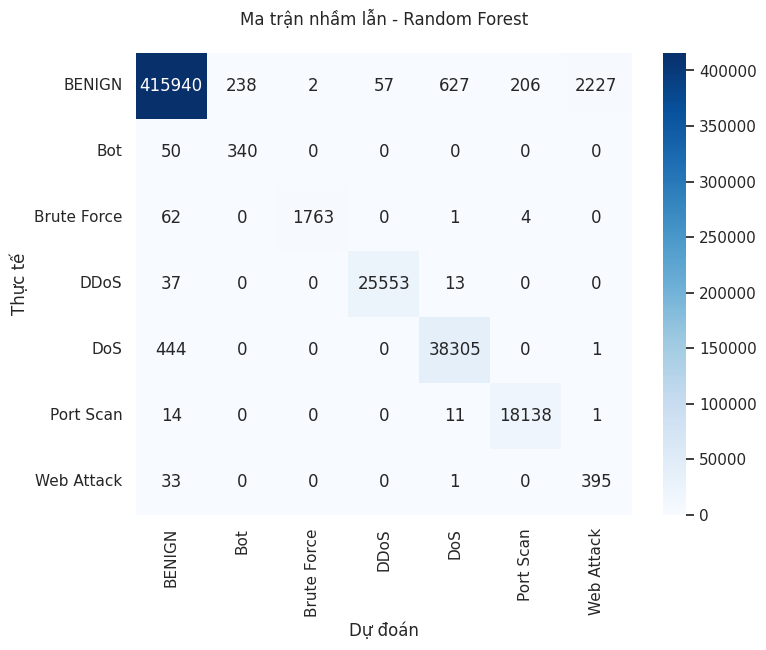

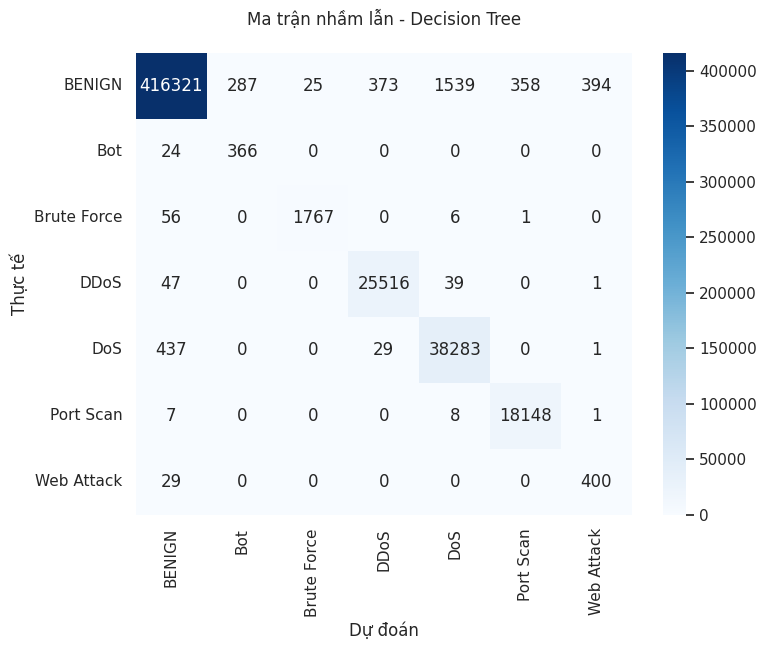

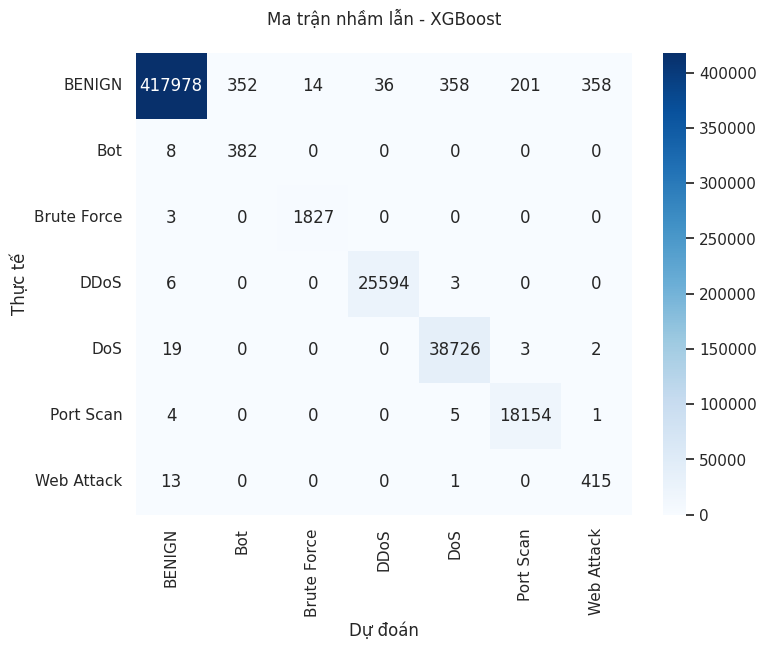

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Giả sử results và target_names đã được tạo từ đoạn mã đánh giá
for i, model_name in enumerate(results['Model']):
    conf_matrix = results['Confusion Matrix'][i]
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Ma trận nhầm lẫn - {model_name}', pad=20)
    plt.ylabel('Thực tế')
    plt.xlabel('Dự đoán')
    plt.show()

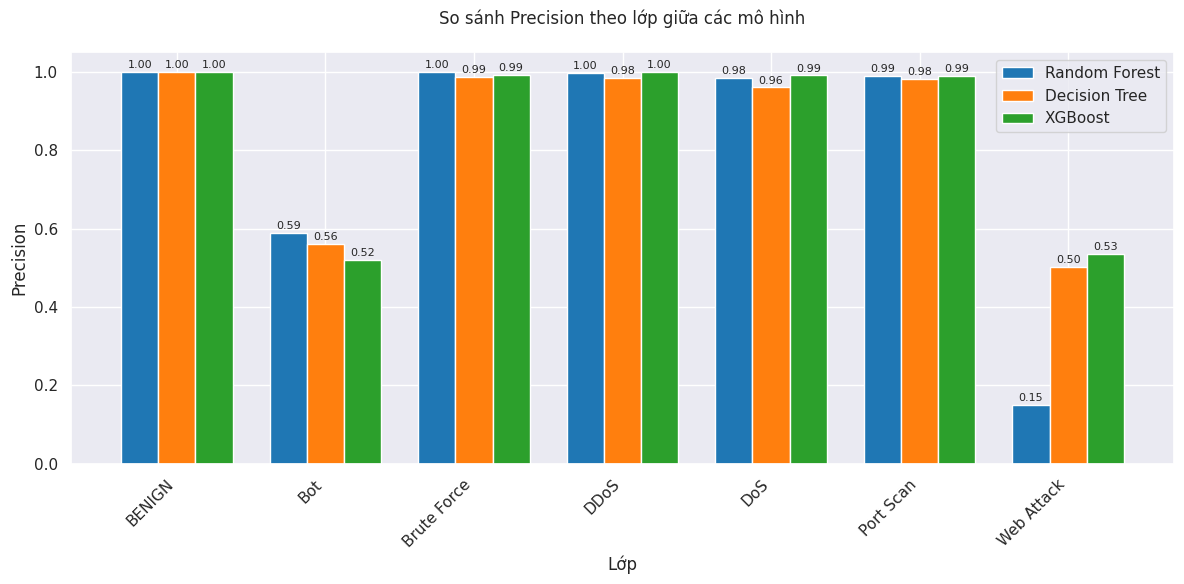

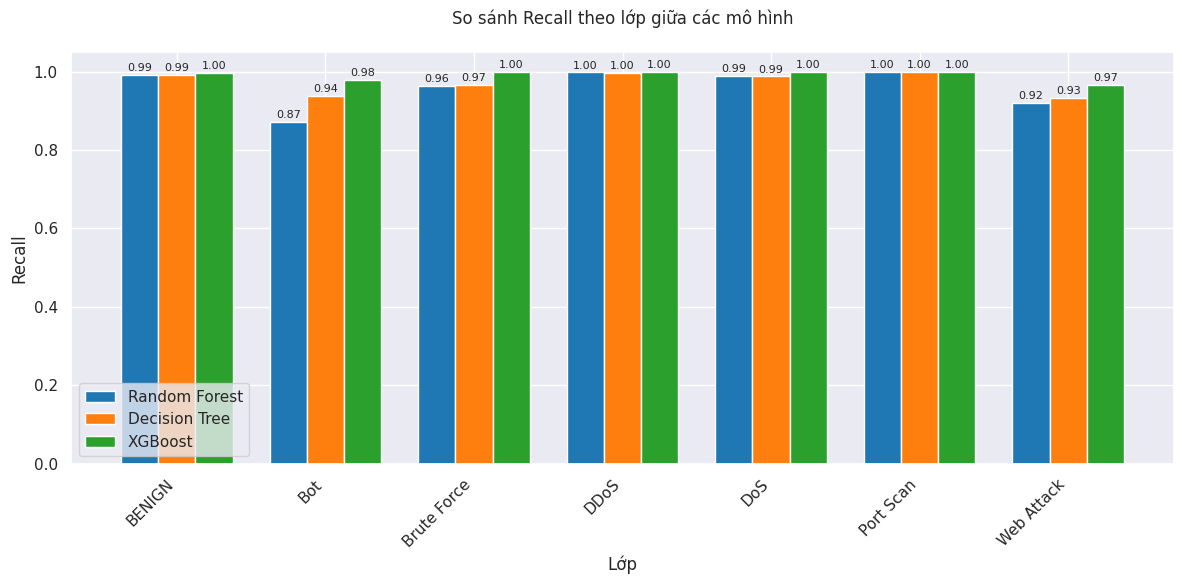

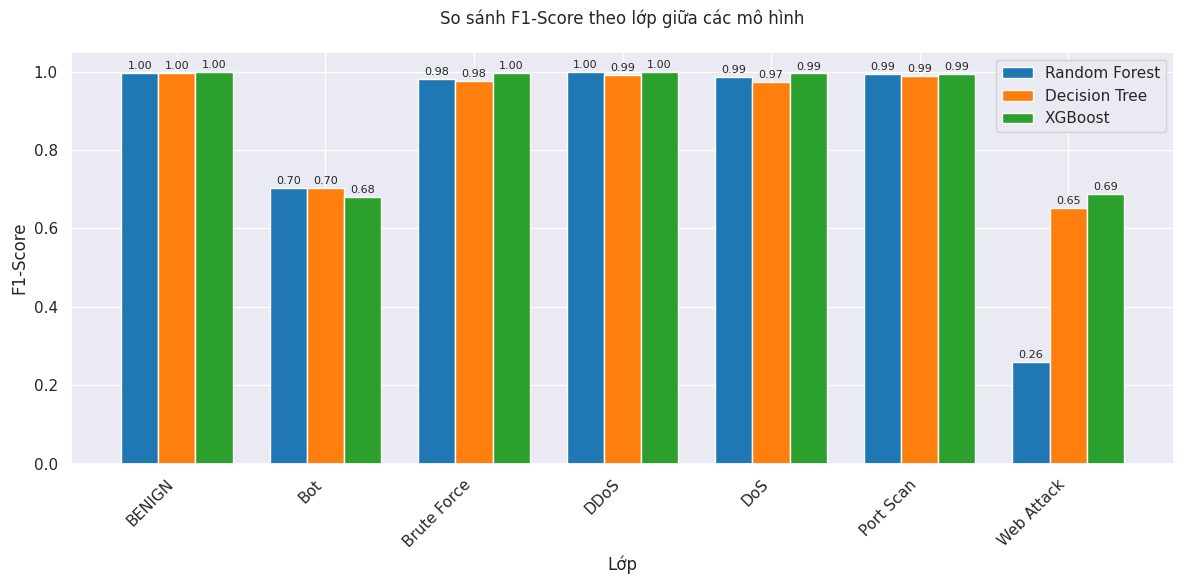

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Giả sử results và target_names đã được tạo từ đoạn mã đánh giá
metrics = ['Precision', 'Recall', 'F1-Score']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for metric in metrics:
    fig, ax = plt.subplots(figsize=(12, 6))
    x = np.arange(len(target_names))
    width = 0.25

    for i, model_name in enumerate(results['Model']):
        report = results['Classification Report'][i]
        values = [report[cls][metric.lower()] for cls in target_names]
        ax.bar(x + i*width, values, width, label=model_name, color=colors[i])

        for j, value in enumerate(values):
            ax.text(j + i*width, value + 0.01, f'{value:.2f}', ha='center', fontsize=8)

    ax.set_xlabel('Lớp')
    ax.set_ylabel(metric)
    ax.set_title(f'So sánh {metric} theo lớp giữa các mô hình', pad=20)
    ax.set_xticks(x + width)
    ax.set_xticklabels(target_names, rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    plt.show()